In [1]:
import lsst.afw.image as afwImage
import glob
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sigmaclip

In [2]:
!pwd

/pscratch/sd/s/shl159/projects/update_plots/dia_improvement/devel


In [3]:
data_dir = '/pscratch/sd/s/shl159/Cori/projects/fake_injection_v23/dia_improvement/devel/data'
calexp_pattern = f'{data_dir}/patch_0to6/injection/*/fake_20/calexp/*/*/*.fits'


In [4]:
"""
sky_mag = []
calexp_path_list = glob.glob(calexp_pattern)
print(len(calexp_path_list))
""";

In [5]:
"""
unique_calexp = []
for path in calexp_path_list:
    unique_calexp.append(path.split('/')[-1])
unique_calexp = np.unique(unique_calexp)
print(len(unique_calexp))
""";
# We use all calexp paths including duplicate paths.

In [6]:
"""
sky_mag_list = []
for idx, calexp_path in enumerate(calexp_path_list):
    calexp_exp = afwImage.ExposureF(calexp_path)
    photo_calib = calexp_exp.getPhotoCalib()
    var = calexp_exp.getVariance().array
    var = var[~np.isnan(var)]
    clipped, _, _ = sigmaclip(var, low=5, high=5)
    median_of_var = np.median(clipped)
    # calexp pixel scale (arcsec/pixel) 0.2 arcsec
    var_per_arcsec2 = median_of_var / 0.2 / 0.2
    var_mag = photo_calib.instFluxToMagnitude(var_per_arcsec2)
    sky_mag_list.append(var_mag)
    
sky_mag_table = pd.DataFrame({'calexp_path': calexp_path_list, 'sky_mag': sky_mag_list})
sky_mag_table.to_csv(f'{data_dir}/table/gal_4639/sky_mag.csv', index=False)
""";

#### Magnitude

run get_detected sources script first

In [7]:
"""
sky_mag_table = pd.read_csv(f'{data_dir}/table/gal_4639/sky_mag.csv')
# We cannot apply sigmaclip to magnitude
detected_sources = pd.read_csv('./data/table/gal_4639/detected_sources_default.csv')

fig, ax = plt.subplots(figsize=(8, 6))
threshold = 5
color_list = ['r', 'orange', 'magenta', 'g', 'blue']
tick_labels = ['', '', '',
               '20', '',  '',  '',  '',  '',  '',  '',  '',  '',  
               '21', '',  '',  '',  '',  '',  '',  '',  '',  '', 
               '22', '',  '',  '',  '',  '',  '',  '',  '',  '',
               '23',  '',  '',  '',  '',  '',  '',  '',  '',  '',
               '24', '', '', '']
for i, mag in enumerate([20, 21, 22, 23, 24]):
    color = color_list[i]
    detected_mag = detected_sources.loc[detected_sources.fake_mag == mag].detected_mag
    ax.hist(detected_mag, color=color, histtype='step', bins=np.arange(19.65, 24.35, 0.1), align='mid');
    ax.axvline(x=mag, color=color, linestyle='dashed', label=f'Injected Mag: {mag}')
    o_one_mag_frac = (np.abs(detected_mag - mag) <= 0.1).sum() / len(detected_mag)
    b_01_mag_frac = ( (detected_mag - mag) > 0.1 ).sum() / len(detected_mag)
    s_01_mag_frac = ( (detected_mag - mag) < -0.1 ).sum() / len(detected_mag)
    print(f'true mag: {mag}, fraction within 0.1 mag: {o_one_mag_frac}, > 0.1 frac: {b_01_mag_frac}, < 0.1 frac: {s_01_mag_frac}')
    ax.set_yscale('log')
    ax.legend(fontsize=10)
ax.hist(sky_mag_table.loc[:, 'sky_mag'], bins=np.arange(19.65, 24.35, 0.1), color='cyan', align='mid', label='Sky Mag')
ax.legend(fontsize=10)
ax.set_xticks(np.arange(19.7, 24.4, 0.1))
ax.set_xticklabels(tick_labels)
ax.set_xlabel('Detected Magnitude', size=14)
ax.set_ylabel('Count', size=14)
#plt.savefig('./plots_and_tables/detected_mag.pdf')
""";

true mag: 20, fraction within 0.1 mag: 0.9983432736911863, > 0.1 frac: 0.0016567263088137839, < 0.1 frac: 0.0
true mag: 21, fraction within 0.1 mag: 0.9945346141106327, > 0.1 frac: 0.005299768135144088, < 0.1 frac: 0.00016561775422325274
true mag: 22, fraction within 0.1 mag: 0.9064831702868512, > 0.1 frac: 0.06134969325153374, < 0.1 frac: 0.03216713646161499
true mag: 23, fraction within 0.1 mag: 0.5738381482146061, > 0.1 frac: 0.19217656558406604, < 0.1 frac: 0.23380584963215503
true mag: 24, fraction within 0.1 mag: 0.0821917808219178, > 0.1 frac: 0.0, < 0.1 frac: 0.9178082191780822


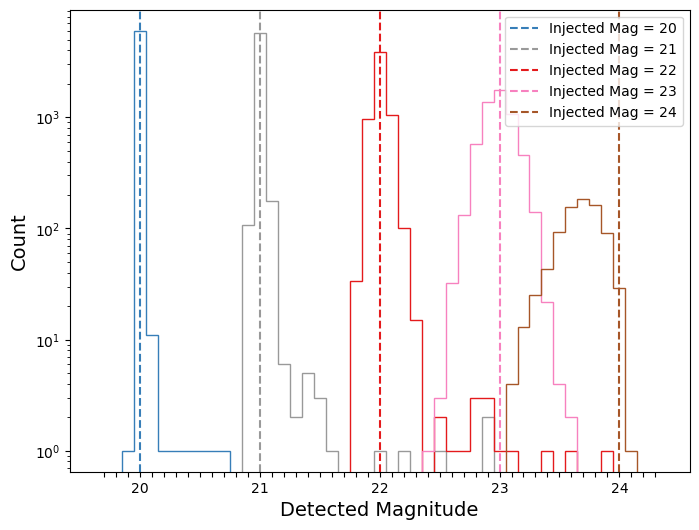

In [9]:
# We cannot apply sigmaclip to magnitude
detected_sources = pd.read_csv('./data/table/gal_4639/detected_sources_default.csv')

fig, ax = plt.subplots(figsize=(8, 6))
threshold = 5
CBCC = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
color_list = [CBCC[0], CBCC[6], CBCC[7], CBCC[3], CBCC[4]]
tick_labels = ['', '', '',
               '20', '',  '',  '',  '',  '',  '',  '',  '',  '',  
               '21', '',  '',  '',  '',  '',  '',  '',  '',  '', 
               '22', '',  '',  '',  '',  '',  '',  '',  '',  '',
               '23',  '',  '',  '',  '',  '',  '',  '',  '',  '',
               '24', '', '', '']
for i, mag in enumerate([20, 21, 22, 23, 24]):
    color = color_list[i]
    detected_mag = detected_sources.loc[detected_sources.fake_mag == mag].detected_mag
    ax.hist(detected_mag, color=color, histtype='step', bins=np.arange(19.65, 24.35, 0.1), align='mid');
    ax.axvline(x=mag, color=color, linestyle='dashed', label=f'Injected Mag = {mag}')
    o_one_mag_frac = (np.abs(detected_mag - mag) <= 0.1).sum() / len(detected_mag)
    b_01_mag_frac = ( (detected_mag - mag) > 0.1 ).sum() / len(detected_mag)
    s_01_mag_frac = ( (detected_mag - mag) < -0.1 ).sum() / len(detected_mag)
    print(f'true mag: {mag}, fraction within 0.1 mag: {o_one_mag_frac}, > 0.1 frac: {b_01_mag_frac}, < 0.1 frac: {s_01_mag_frac}')
    ax.set_yscale('log')
    ax.legend(fontsize=10)
ax.set_xticks(np.arange(19.7, 24.4, 0.1))
ax.set_xticklabels(tick_labels)
ax.set_xlabel('Detected Magnitude', size=14)
ax.set_ylabel('Count', size=14)
plt.savefig('./plots_and_tables/detected_mag.pdf')